## SVM (support vector machines)
* Grundidé: hyperplan för att separera klasser.
* Skulle kunna göra feature expansion.
* **Kerneltrick**
* Hyperplan har vi redan sett men inte namngivit.
* Om B0 = 0 ingår origo, annars inte.
* **Avstånd punkt/plan.** 
* P0 = (x0, y0, z0)
* A = (p, q, r)
* |QP| = |(x0 - p)a + (y0 - q)b + (z0 - r)c| / roten ur a2 + b2 + c2
* **Maximal margin (classifier)**
* Använd en soft margin, om marginalen måste vara tom blir metoden känslig för brus (outliers).
* **Kernel**
- Matris med "vikter", används mkt i neurala nätverk och bildnätverk.
- u * n = (similarity measure/likhetsmått)
- f(x)=B0+∑i=1n α i <x1,x i >
* **Kernel funktioner**
- <u|, v|> = u| * v| (euclidiskt)
- Beräknar inre produkter för d-dimensionella polynom, motsvarar polynom expansion.
- RBF (radial basis function) gamma >> o liten sigma^2, gamma << 1, stor sigma^2 (mjuka linjer), (gamma => hyperparameter.)
* **Multinomiella klasser**
- ova: one-versus-all (dyrare att använda än ovo)
- ovo: one-versus-one
* Kan bli dyrt för stora datamängder (dvs gigabyte+)

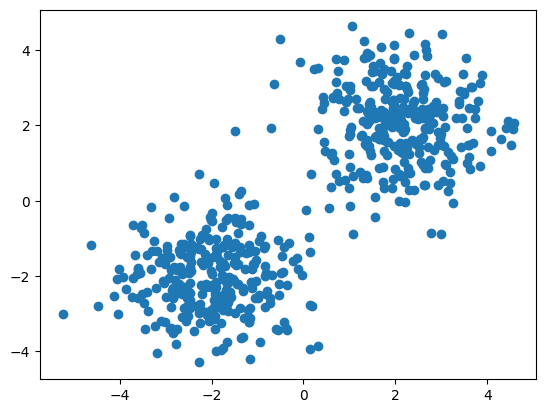

In [12]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from utils import plot_svm_margins

blobs = make_blobs([300, 300], 2, random_state=42, centers = [(-2,-2), (2,2)])
blobs_data = blobs[0]
blobs_label = blobs[1]

plt.scatter(blobs_data[:,0], blobs_data[:,1])

In [13]:
import seaborn as sns 
import pandas as pd 
import numpy as np 

blobs_with_label = np.c_[blobs_data, blobs_label]

blobs_with_label


array([[-1.77590752, -1.9874076 ,  0.        ],
       [ 1.9803622 ,  2.55248995,  1.        ],
       [-2.81822068,  0.09238728,  0.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  1.        ],
       [ 0.65181458,  2.74326409,  1.        ],
       [ 1.07676675,  0.64831539,  1.        ]])

<Axes: xlabel='X1', ylabel='X2'>

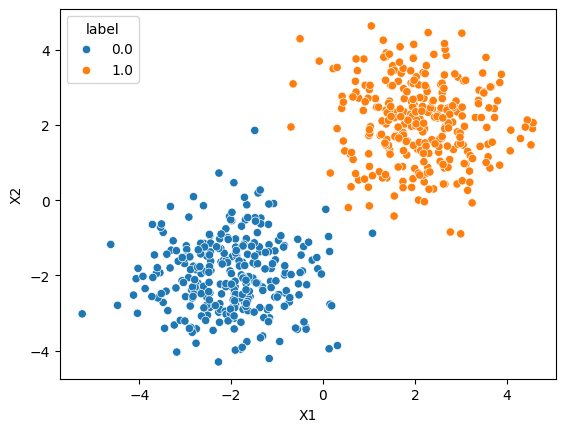

In [14]:
df = pd.DataFrame(blobs_with_label, columns=["X1", "X2", "label"])
sns.scatterplot(data = df, x = "X1", y = "X2", hue="label")

In [15]:
X, y = blobs_data, blobs_label
X[:5]


array([[-1.77590752, -1.9874076 ],
       [ 1.9803622 ,  2.55248995],
       [-2.81822068,  0.09238728],
       [ 2.78580016,  2.42545756],
       [-2.24896415, -1.02842905]])

In [16]:
y[:5]

array([0, 1, 0, 1, 0])

In [17]:
## SVM 

### linear kernel

In [20]:
from sklearn.svm import SVC
from utils import plot_svm_margins



fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 0.1, 0.01], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="linear", C=C), X, y)
    plt.title(f"C = {C}, linear kernel")

# when using linear kernel, rather use LinearSVC


ImportError: cannot import name 'svm' from 'utils' (c:\Users\user\.virtualenvs\Machine-learning-AI23\.venv\Lib\site-packages\utils\__init__.py)

In [ ]:
### radial basis kernel

NameError: name 'plot_svm_margins' is not defined

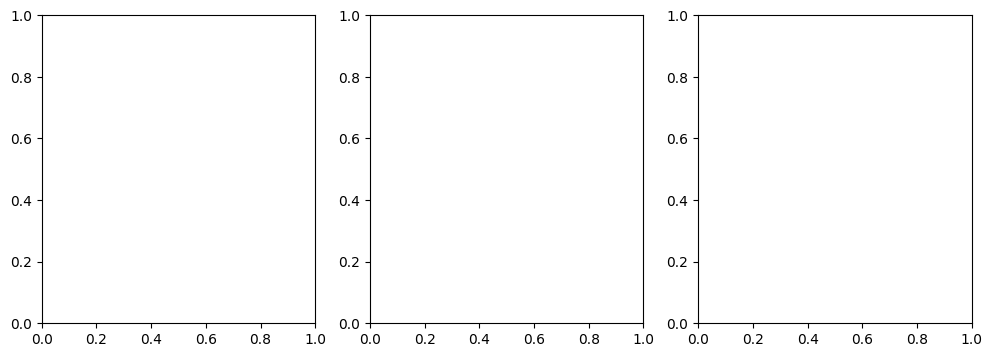

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="rbf", C=C), X, y)
    plt.title(f"C = {C}, radial basis function kernel")

## Polynomial kernel

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="poly", C=C, degree=3), X, y)
    plt.title(f"C = {C}, polynomial kernel kernel")

### radial basis kernel

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="rbf", C=C), X, y)
    plt.title(f"C = {C}, radial basis function kernel")

### sigmoid kernel

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

# C is regularization (budget) parameter - makes margin more soft
for i, C in enumerate([10, 1, 0.1], 1):
    plt.subplot(1, 3, i)
    plot_svm_margins(SVC(kernel="sigmoid", C=C), X, y)
    ax[i-1].set(title=f"C = {C}, sigmoid function kernel")